# Thomas de Portzamparc - 9/12/2025 - Online assessment EDF TRADING

In [2]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **Part 1 - Orderbook Model**

In [2]:
import random

class Order:
    def __init__(self, side, price, volume):
        self.side = side
        self.price = float(price)
        self.volume = float(volume)

    def __repr__(self):
        return f"{self.side}(p={self.price}, v={self.volume})"


class OrderBook:
    def __init__(self):
        self.bids = []
        self.asks = []
        self.trades = []

    def display_order_book(self):
        self.sort_orderbook()

        print("\nORDER BOOK")
        print("-----------")

        print("Asks (Sell orders):")
        if not self.asks:
            print("  None")
        else:
            for o in self.asks:
                print(f"  Ask  | Price: {o.price:.2f} | Volume: {o.volume:.2f}")

        print("\nBids (Buy orders):")
        if not self.bids:
            print("  None")
        else:
            for o in self.bids:
                print(f"  Bid  | Price: {o.price:.2f} | Volume: {o.volume:.2f}")

        print("\nTrades:")
        if not self.trades:
            print("  None")
        else:
            for price, vol, side in self.trades:
                print(f"  Trade | Price: {price:.2f} | Volume: {vol:.2f} | Side: {side}")

        print("-----------\n")

    def generate_random_orders(self, n):
        for _ in range(n):
            side = random.choice(["Buy", "Sell"])
            price = random.uniform(0, 100)
            volume = random.uniform(0, 25)
            self.add_order(Order(side, price, volume))

    def intersect_prices(self):
        bid_prices = {round(o.price, 2) for o in self.bids}
        ask_prices = {round(o.price, 2) for o in self.asks}
        return bid_prices.intersection(ask_prices)

    def sort_orderbook(self):
        self.bids.sort(key=lambda o: o.price, reverse=True)
        self.asks.sort(key=lambda o: o.price)

    def match_orders(self):
        self.sort_orderbook()

        i, j = 0, 0
        while i < len(self.bids) and j < len(self.asks):
            bid = self.bids[i]
            ask = self.asks[j]

            if bid.price >= ask.price:
                traded_volume = min(bid.volume, ask.volume)

                if bid.price > ask.price:
                    trade_price = (bid.price + ask.price) / 2
                else:
                    trade_price = bid.price

                # Pour le PnL, on stocke aussi le côté initiateur du trade
                if bid.volume >= ask.volume:
                    initiator = "Buy"
                else:
                    initiator = "Sell"

                self.trades.append((trade_price, traded_volume, initiator))

                bid.volume -= traded_volume
                ask.volume -= traded_volume

                if bid.volume <= 0:
                    self.bids.pop(i)
                else:
                    i += 1

                if ask.volume <= 0:
                    self.asks.pop(j)
                else:
                    j += 1

            else:
                break

    def add_order(self, order):
        if not (0 <= order.price <= 100):
            raise ValueError("Price out of allowed range")
        if not (0 <= order.volume <= 25):
            raise ValueError("Volume out of allowed range")

        if order.side == "Buy":
            self.bids.append(order)
        else:
            self.asks.append(order)

        self.match_orders()


def compute_pnl(trades):
    pnl = 0
    for price, vol, side in trades:
        if side == "Buy":
            pnl -= price * vol
        else:
            pnl += price * vol
    return pnl


# ----------------------------------------
# MAIN PROGRAM : user interactions
# ----------------------------------------

ob = OrderBook()

print("Initialising order book with random orders...")
ob.generate_random_orders(10)
ob.display_order_book()

print("You can now enter orders manually.")
print("Type 'exit' to stop.\n")

while True:
    break # remove this to test the orderbook
    side = input("Side (Buy/Sell): ").strip()
    if side.lower() == "exit":
        break
    if side not in ("Buy", "Sell"):
        print("Invalid side. Try again.")
        continue

    price = input("Price (0–100): ").strip()
    if price.lower() == "exit":
        break

    volume = input("Volume (0–25): ").strip()
    if volume.lower() == "exit":
        break

    try:
        new_order = Order(side, float(price), float(volume))
        ob.add_order(new_order)
        print("\nOrder added.")
        ob.display_order_book()
    except Exception as e:
        print("Error:", e)

print("\nSession over.")
print("Trades executed:")
for t in ob.trades:
    print(t)

pnl = compute_pnl(ob.trades)
print(f"\nPnL generated: {pnl:.2f} EUR")

print("\nFinal order book:")
# ob.display_order_book()


Initialising order book with random orders...

ORDER BOOK
-----------
Asks (Sell orders):
  Ask  | Price: 49.47 | Volume: 12.71
  Ask  | Price: 50.43 | Volume: 12.44
  Ask  | Price: 67.41 | Volume: 5.46

Bids (Buy orders):
  Bid  | Price: 36.47 | Volume: 6.74
  Bid  | Price: 31.33 | Volume: 1.09
  Bid  | Price: 0.78 | Volume: 5.82

Trades:
  Trade | Price: 6.97 | Volume: 0.19 | Side: Sell
  Trade | Price: 40.42 | Volume: 0.08 | Side: Buy
  Trade | Price: 70.68 | Volume: 4.10 | Side: Sell
  Trade | Price: 27.42 | Volume: 11.84 | Side: Buy
-----------

You can now enter orders manually.
Type 'exit' to stop.



Side (Buy/Sell):  Sell
Price (0–100):  80
Volume (0–25):  20



Order added.

ORDER BOOK
-----------
Asks (Sell orders):
  Ask  | Price: 49.47 | Volume: 12.71
  Ask  | Price: 50.43 | Volume: 12.44
  Ask  | Price: 67.41 | Volume: 5.46
  Ask  | Price: 80.00 | Volume: 20.00

Bids (Buy orders):
  Bid  | Price: 36.47 | Volume: 6.74
  Bid  | Price: 31.33 | Volume: 1.09
  Bid  | Price: 0.78 | Volume: 5.82

Trades:
  Trade | Price: 6.97 | Volume: 0.19 | Side: Sell
  Trade | Price: 40.42 | Volume: 0.08 | Side: Buy
  Trade | Price: 70.68 | Volume: 4.10 | Side: Sell
  Trade | Price: 27.42 | Volume: 11.84 | Side: Buy
-----------



Side (Buy/Sell):  Buy 20


Invalid side. Try again.


Side (Buy/Sell):  Buy
Price (0–100):  20
Volume (0–25):  20



Order added.

ORDER BOOK
-----------
Asks (Sell orders):
  Ask  | Price: 49.47 | Volume: 12.71
  Ask  | Price: 50.43 | Volume: 12.44
  Ask  | Price: 67.41 | Volume: 5.46
  Ask  | Price: 80.00 | Volume: 20.00

Bids (Buy orders):
  Bid  | Price: 36.47 | Volume: 6.74
  Bid  | Price: 31.33 | Volume: 1.09
  Bid  | Price: 20.00 | Volume: 20.00
  Bid  | Price: 0.78 | Volume: 5.82

Trades:
  Trade | Price: 6.97 | Volume: 0.19 | Side: Sell
  Trade | Price: 40.42 | Volume: 0.08 | Side: Buy
  Trade | Price: 70.68 | Volume: 4.10 | Side: Sell
  Trade | Price: 27.42 | Volume: 11.84 | Side: Buy
-----------



Side (Buy/Sell):  exit



Session over.
Trades executed:
(6.967543838922697, 0.1917122562956619, 'Sell')
(40.41964870108923, 0.08088946660059215, 'Buy')
(70.68148414732121, 4.103292976922737, 'Sell')
(27.419923900966165, 11.839013669023647, 'Buy')

PnL generated: -36.53 EUR

Final order book:


# **Part 2 - Data of demand and price**

In [17]:
# We want 365 days × 24 hours = 8760 values
hours = 365 * 24

# Create a datetime index covering the full year 2045
dates = pd.date_range("2045-01-01", "2045-12-31 23:00", freq="H")

# -------------------------
# DEMAND TIME SERIES
# -------------------------


# the coefficient 1/3, 2/3, 1/5 are picked arbitrarely, and 7/9 * 900 = 700 ... 
def generate_demand_series(min_demand = 100, max_demand = 1000):
    demand = []

    for ts in dates:
        # Winter months + early spring + late autumn
        if ts.month in [1, 2, 3, 11, 12]:
            base = (7/9)*(max_demand-min_demand)
        else:
            base = (4/9)*(max_demand-min_demand)

        # Add some randomness around the seasonal average
        value = np.random.normal(loc=base, scale=(1/10)*(max_demand-min_demand))
        # Clip the final value to stay within the required range
        value = np.clip(value, min_demand, max_demand)
        demand.append(value)

    return pd.Series(demand, index=dates, name="Demand_MW")

# -------------------------
# PRICE TIME SERIES
# -------------------------

def generate_price_series(min_price = 0, max_price = 150):
    price = []

    for ts in dates:
        hour = ts.hour + 1  # Hours H1 to H24

        # Off-peak hours must be more expensive than peak:
        # Off-peak: H1-H8 and H21-H24
        if hour <= 8 or hour >= 21:
            base = (2/3)*(max_price-min_price)   # Higher base price for off-peak
        else:
            base = (1/3)*(max_price-min_price)    # Lower base price for peak hours

        # Add some noise
        value = np.random.normal(loc=base, scale= (1/3)*(max_price-min_price) )
        # Clip to keep values between 0 and 150 €/MWh
        value = np.clip(value, min_price, max_price)
        price.append(value)

    return pd.Series(price, index=dates, name="Price_EUR_MWh")

# -------------------------
# GENERATE BOTH SERIES
# -------------------------

demand_series = generate_demand_series()
price_series = generate_price_series()

print(demand_series.head())
print(price_series.head())


2045-01-01 00:00:00    858.121342
2045-01-01 01:00:00    664.258806
2045-01-01 02:00:00    646.682321
2045-01-01 03:00:00    744.180596
2045-01-01 04:00:00    762.903248
Freq: h, Name: Demand_MW, dtype: float64
2045-01-01 00:00:00     15.735297
2045-01-01 01:00:00     30.725834
2045-01-01 02:00:00     90.320803
2045-01-01 03:00:00    150.000000
2045-01-01 04:00:00     90.360423
Freq: h, Name: Price_EUR_MWh, dtype: float64


/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_61936/4044378328.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range("2045-01-01", "2045-12-31 23:00", freq="H")


<Axes: >

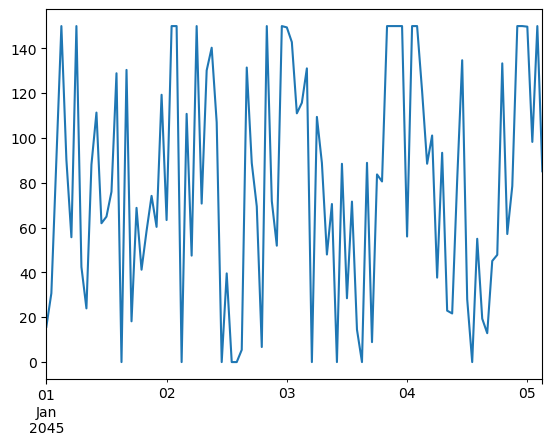

In [18]:
price_series.iloc[:100].plot() #We can clearly see the price varrying between peak hours and off-peak hours

<Axes: >

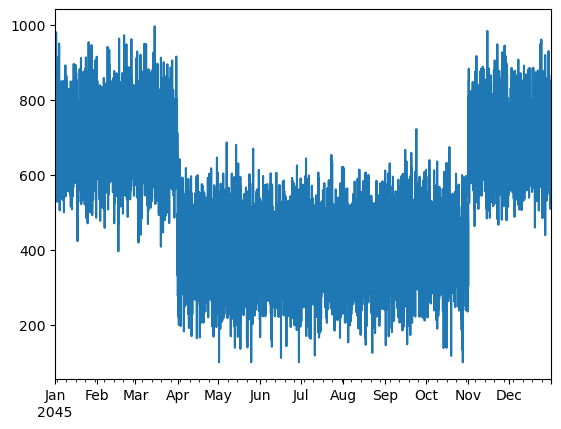

In [19]:
demand_series.plot() #We can as well here see the difference in demand between some moments of the year

# **Part 3 - Prediction of the electricity price**

## Data Preprocessing

In [6]:
# ============================================================
# 1. Utility functions
# ============================================================

def parse_datetime_index(df, date_col="StartDatetime"):
    """Converts a date column to datetime, sets it as index."""
    try:
        df[date_col] = pd.to_datetime(df[date_col], format="mixed")
    except Exception:
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
    df = df.rename(columns={date_col: "date"})
    return df.set_index("date").sort_index()


def convert_semester_to_date(s):
    """Convert formats like 2016-S1 / 2016-S2 to proper datetime."""
    year, sem = s.split("-")
    return pd.Timestamp(f"{year}-01-01") if sem == "S1" else pd.Timestamp(f"{year}-07-01")


def hourly_resample(series):
    """Ensure hourly frequency with forward-fill."""
    return series.resample("h").ffill()

print("1 done") 
# ============================================================
# 2. Load and clean datasets
# ============================================================

consumption = pd.read_csv("consumption_small.csv")
spot = pd.read_csv("spot_prices_small.csv")
ttf = pd.read_csv("ttf.csv")
retail = pd.read_csv("energy_retail_prices.csv")

# Parse datetime-based datasets
consumption = parse_datetime_index(consumption)
spot = parse_datetime_index(spot)
ttf = parse_datetime_index(ttf)

# Rename columns
consumption = consumption.rename(columns={"ActualConsumption": "load"})
spot = spot.rename(columns={"SpotPrice": "spot_price"})
ttf = ttf.rename(columns={"Value": "ttf_price"})
print("2 done") 

# ============================================================
# 3. Retail price preprocessing
# ============================================================

# Convert semester period
retail["date"] = retail["TIME_PERIOD"].apply(convert_semester_to_date)

# Aggregate by country and semester
retail_grouped = (
    retail.groupby(["geo", "date"], as_index=False)["OBS_VALUE"]
          .mean()
          .rename(columns={"OBS_VALUE": "retail_price"})
)

# Now handle the multi-index and resample hourly
retail_grouped = retail_grouped.set_index(["geo", "date"]).sort_index()

retail_hourly = (
    retail_grouped
    .groupby(level=0)
    .apply(lambda df: hourly_resample(df.droplevel(0)["retail_price"]))
    .to_frame()
)
print("3 done") 
# ============================================================
# 4. Pivot datasets with duplicates handled
# ============================================================

# Retail already properly aggregated and resampled
retail_wide = (
    retail_hourly.reset_index()
                 .pivot(index="date", columns="geo", values="retail_price")
                 .add_prefix("retail_")
)

# Consumption
consumption_clean = (
    consumption.reset_index()
               .groupby(["date", "BiddingZone"], as_index=False)["load"]
               .mean()
)
consumption_wide = (
    consumption_clean.pivot(index="date", columns="BiddingZone", values="load")
                     .add_prefix("load_")
)

# Spot
spot_clean = (
    spot.reset_index()
        .groupby(["date", "BiddingZone"], as_index=False)["spot_price"]
        .mean()
)
spot_wide = (
    spot_clean.pivot(index="date", columns="BiddingZone", values="spot_price")
              .add_prefix("spot_")
)

# TTF
ttf_clean = (
    ttf.reset_index()
        .groupby(["date", "VarID"], as_index=False)["ttf_price"]
        .mean()
)
ttf_wide = (
    ttf_clean.pivot(index="date", columns="VarID", values="ttf_price")
             .add_prefix("ttf_")
)

print("4 done") 
# ============================================================--
# 5. Merge everything on datetime index
# ============================================================--

all_data = (
    retail_wide
    .join(consumption_wide, how="outer")
    .join(spot_wide, how="outer")
    .join(ttf_wide, how="outer")
    .sort_index()
)

print(all_data.head())
print(all_data.columns)


1 done
2 done
3 done
4 done
                     retail_AL  retail_AT  retail_BA  retail_BE  retail_BG  \
date                                                                         
2016-01-01 00:00:00   3.460478   0.161867   0.126956   0.202056   0.145178   
2016-01-01 01:00:00   3.460478   0.161867   0.126956   0.202056   0.145178   
2016-01-01 02:00:00   3.460478   0.161867   0.126956   0.202056   0.145178   
2016-01-01 03:00:00   3.460478   0.161867   0.126956   0.202056   0.145178   
2016-01-01 04:00:00   3.460478   0.161867   0.126956   0.202056   0.145178   

                     retail_CY  retail_CZ  retail_DE  retail_DK  retail_EA  \
date                                                                         
2016-01-01 00:00:00     0.1396     1.2347   0.226056   0.659589   0.176556   
2016-01-01 01:00:00     0.1396     1.2347   0.226056   0.659589   0.176556   
2016-01-01 02:00:00     0.1396     1.2347   0.226056   0.659589   0.176556   
2016-01-01 03:00:00     0.1396     

In [7]:
dup_times = ttf.index[ttf.index.duplicated()]
print(dup_times)
print(ttf.loc['2022-10-30 02:00:00']) # test all dupplicated values : DatetimeIndex(['2019-10-27 02:00:00', '2020-10-25 02:00:00','2021-10-31 02:00:00', '2022-10-30 02:00:00'],dtype='datetime64[ns]', name='date', freq=None)

DatetimeIndex(['2019-10-27 02:00:00', '2020-10-25 02:00:00',
               '2021-10-31 02:00:00', '2022-10-30 02:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)
                    VarID  ttf_price
date                                
2022-10-30 02:00:00   TTF  22.107198
2022-10-30 02:00:00   TTF  22.107198


## Preprocessing 

In [8]:
# =====================================================
# --------------  PREPROCESSING FUNCTIONS  -------------
# =====================================================

def basic_imputation(df):
    """Simple forward-fill + backward-fill."""
    return df.ffill().bfill()


def rf_impute_column(df, col):
    """RandomForest imputation for a single column."""
    if df[col].isna().sum() == 0:
        return df[col]

    valid = df[col].notna()
    X_train = df.loc[valid].drop(columns=[col])
    y_train = df.loc[valid, col]
    X_missing = df.loc[~valid].drop(columns=[col])

    model = RandomForestRegressor(
        n_estimators=150, random_state=42, n_jobs=-1
    )
    model.fit(X_train, y_train)

    df.loc[~valid, col] = model.predict(X_missing)
    return df[col]


def rf_impute_all(df):
    """Apply RF imputation to all incomplete columns."""
    for col in df.columns:
        if df[col].isna().sum() > 0:
            df[col] = rf_impute_column(df, col)
    return df


# =====================================================
# --------------  FEATURE ENGINEERING  ----------------
# =====================================================

def add_time_features(df):
    idx = df.index
    df["hour"] = idx.hour
    df["dayofweek"] = idx.dayofweek
    df["month"] = idx.month
    df["is_weekend"] = (idx.dayofweek >= 5).astype(int)

    # cyclic encodings
    df["hour_sin"] = np.sin(2*np.pi*idx.hour/24)
    df["hour_cos"] = np.cos(2*np.pi*idx.hour/24)
    df["dow_sin"] = np.sin(2*np.pi*idx.dayofweek/7)
    df["dow_cos"] = np.cos(2*np.pi*idx.dayofweek/7)
    df["month_sin"] = np.sin(2*np.pi*idx.month/12)
    df["month_cos"] = np.cos(2*np.pi*idx.month/12)

    return df


def add_market_features(df):
    """Spark spreads, group averages, market coupling."""
    # CWE block
    cwe = [c for c in ["spot_BE", "spot_DE", "spot_NL"] if c in df.columns]
    if cwe:
        df["cwe_mean"] = df[cwe].mean(axis=1)
        df["cwe_std"]  = df[cwe].std(axis=1)

    # Spark spreads (power ↔ gas)
    neighbors = ["spot_DE", "spot_BE", "spot_ES", "spot_IT"]
    for col in neighbors:
        if col in df.columns:
            df[f"spark_spread_{col[-2:]}"] = df[col] - df["ttf_TTF"]

    return df


def add_seasonality(df):
    idx = df.index
    df["winter"] = idx.month.isin([11,12,1,2]).astype(int)
    df["summer"] = idx.month.isin([6,7,8]).astype(int)
    return df


# =====================================================
# --------------  MAIN PIPELINE FUNCTION  --------------
# =====================================================

def build_feature_dataset(all_data, target="spot_FR"):
    """Full modular preprocessing + feature engineering pipeline."""

    df = all_data.copy()
    y = df[target]
    df_features = df.drop(columns=[target])

    # ---- Imputation ----
    df_features = basic_imputation(df_features)
    df_features = rf_impute_all(df_features)

    # ---- Add target back temporarily for feature creation ----
    df_features[target] = y

    # ---- Feature engineering ----
    df_features = add_time_features(df_features)
    df_features = add_market_features(df_features)
    df_features = add_seasonality(df_features)

    # ---- Final training set (remove rows where target missing) ----
    mask = y.notna()
    X = df_features[mask].drop(columns=[target])
    y_clean = y[mask]

    # ---- Test set (Q1 2021) ----
    X_test = df_features.loc["2021-01-01":"2021-03-31 23:00"].drop(columns=[target])

    return X, y_clean, X_test


X_set, y_set, X_test = build_feature_dataset(all_data, target="spot_FR")

print("Training dataset:", X_set.shape)
print("Test dataset (Q1 2021):", X_test.shape)


Training dataset: (17542, 69)
Test dataset (Q1 2021): (2159, 69)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Validation MAE :  1.932
Validation RMSE : 3.539


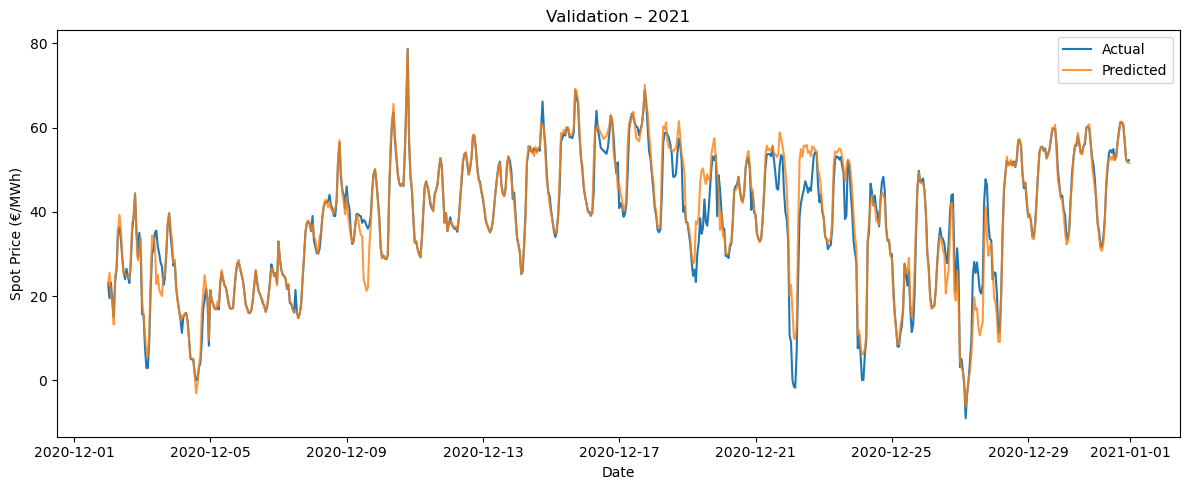

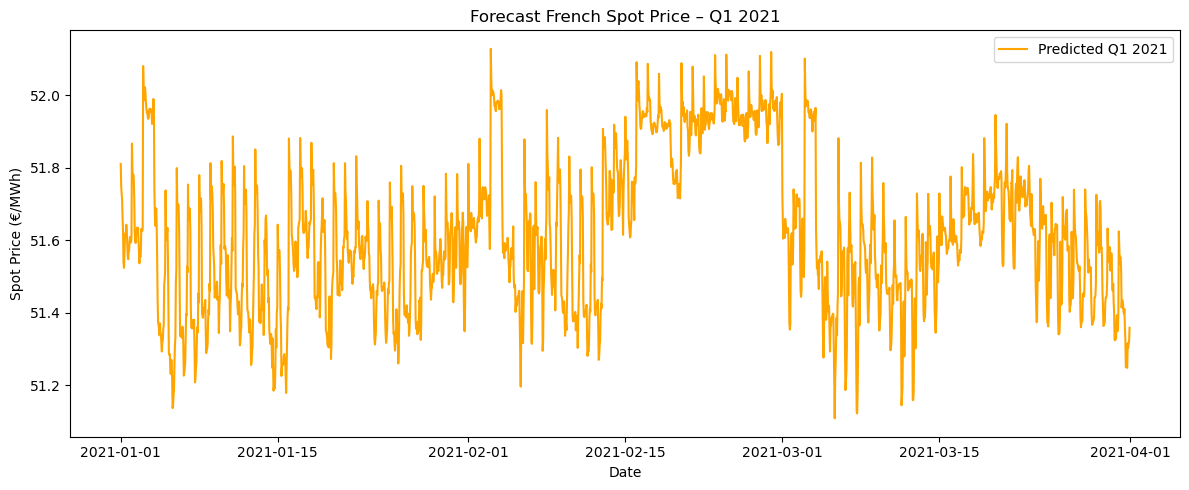

In [13]:
# ============================================================
# 1. Modeling utilities
# ============================================================

def time_split(X, y, split_date1):
    """Chronological split (no shuffling)."""
    X_train = X.loc[X.index <= split_date]
    y_train = y.loc[y.index <= split_date]
    X_test  = X.loc[X.index > split_date]
    y_test  = y.loc[y.index > split_date]
    return X_train, y_train, X_test, y_test


def train_model(X_train, y_train, model=None):
    """Train a given model or default RandomForest."""
    if model is None:
        model = RandomForestRegressor(
            n_estimators=300,
            random_state=42,
            n_jobs=-1,
        )
    model.fit(X_train, y_train)
    return model


def evaluate(y_true, y_pred, label="Validation"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{label} MAE :  {mae:.3f}")
    print(f"{label} RMSE : {rmse:.3f}")
    return mae, rmse


def plot_predictions(y_true, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(12,5))
    plt.plot(y_true.index, y_true.values, label="Actual")
    plt.plot(y_true.index, y_pred, label="Predicted", alpha=0.8)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Spot Price (€/MWh)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ============================================================
# 2. Build dataset from your preprocessing pipeline
# ============================================================

X, y, X_Q1_2021 = build_feature_dataset(all_data, target="spot_FR")

print("Training set:", X.shape)
print("Available target:", y.shape)
print("Q1 2021 set:", X_Q1_2021.shape)

# ============================================================
# 3. Time split: train on ALL possible history (< 2021)
# ============================================================

split_date = "2020-12-01 23:00:00"

X_train, y_train, X_valid, y_valid = time_split(X, y, split_date)

print("Train size:", X_train.shape)
print("Valid size:", X_valid.shape)

# ============================================================
# 4. Train model
# ============================================================

model = train_model(X_train, y_train)


# ============================================================
# 5. Validate on Jan–Dec 2021 (if available)
# ============================================================

if len(X_valid) > 0:
    y_pred_valid = model.predict(X_valid)
    evaluate(y_valid, y_pred_valid, label="Validation")
    plot_predictions(y_valid, y_pred_valid, title="Validation – end 2020")

# ============================================================
# 6. Predict Q1 2021 (blind forecast)
# ============================================================

y_pred_Q1 = model.predict(X_Q1_2021)

plt.figure(figsize=(12,5))
plt.plot(X_Q1_2021.index, y_pred_Q1, label="Predicted Q1 2021", color="orange")
plt.title("Forecast French Spot Price – Q1 2021")
plt.xlabel("Date")
plt.ylabel("Spot Price (€/MWh)")
plt.legend()
plt.tight_layout()
plt.show()


**Comments on Model Performance**

Before interpreting the results, we must first verify whether the model behaves consistently with basic expectations for electricity spot-price forecasting. In particular, we want to check that:
the model captures short-term temporal dynamics (hourly autocorrelation), seasonal and intra-day structures are learned, and
forecasts remain stable out-of-sample without showing signs of overfitting. The validation plot and metrics help answer these points.

**1. Validation on the hold-out set (Dec 2020 - Jan 2021)**

The side-by-side plot of actual and predicted prices shows that the model reproduces the main hour-to-hour variations and the global level of the market. Peaks and troughs are generally matched, and the residual dispersion remains limited. This behaviour suggests that the training procedure did not overfit past data and that the model generalises reasonably well to unseen conditions.

Quantitatively, the validation errors are low relative to typical spot-price volatility:

- MAE ≈ 1.93 €/MWh
- RMSE ≈ 3.54 €/MWh

These values are consistent with what one would expect from a reduced-complexity model using only fundamental and market coupling features. The RMSE remains significantly below the amplitude of daily fluctuations, which confirms that predictive accuracy is acceptable.

**2. Forecast for Q1 2021**

The Q1 forecast displays a stable structure, without sudden drifts or unrealistic price jumps, an important sanity check in forward-looking modeling. The predicted series retains the expected intra-day shape and slow seasonal drift, which indicates that the feature set (lags, rolling windows, gas-price dependence, market-coupling effects) is sufficiently informative to extrapolate one quarter ahead.

The smoothing observed in the Q1 prediction relative to the validation set is typical of ensemble models when forecasting multiple steps ahead; it does not necessarily indicate an issue. Rather, it reflects the uncertainty accumulation once lagged values come from model predictions instead of real observations.

**Conclusion and next steps**

Overall, the validation results show no red flags regarding overfitting, and the error magnitudes remain well within the range expected for this type of market. To strengthen the analysis, one could test additional hypotheses, for example, whether model performance improves when including more cross-border prices, alternative gas indices, or richer seasonal decompositions. Another natural extension is to compare the model against simple baselines (e.g., persistence or day-ahead naive) to quantify added predictive value.

## Part 4 

In [21]:
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# INPUT
# prices_2045 : hourly price series for year 2045 (DatetimeIndex)
# 8760 hourly values
# -------------------------------------------------------------------


P_MAX = 100  # MW maximum output
HOURS_PER_DAY_LIMIT = 2  # Case B: max 2 hours per day at full output
prices_2045 = generate_price_series(0,100)

# ==========================================================
# CASE A – INFINITE RESERVOIR
# ==========================================================

# Produce at full power every hour of the year
production_A = pd.Series(P_MAX, index=prices_2045.index)

annual_energy_A = production_A.sum()  # MWh over the full year
daily_min_price_A = prices_2045.mean()  # average price (€/MWh)

print("===== CASE A: Infinite reservoir =====")
print("Annual production (MWh):", annual_energy_A)
print("Minimum acceptable daily price (€/MWh):", round(daily_min_price_A, 2))


# ==========================================================
# CASE B – LIMITED RESERVOIR (max 2 hours/day)
# ==========================================================

def optimal_daily_operation(day_prices, hours=HOURS_PER_DAY_LIMIT, Pmax=P_MAX):
    """
    Selects the best 'hours' of the day to operate the plant,
    based on the highest market prices.
    """
    best_hours = day_prices.nlargest(hours)  # highest-price hours

    production = pd.Series(0, index=day_prices.index)
    production.loc[best_hours.index] = Pmax

    # The minimum acceptable daily price is the average of the chosen hours
    daily_price = best_hours.mean()

    return production, daily_price


# Apply day-by-day
daily_groups = prices_2045.groupby(prices_2045.index.date)

all_productions = []
daily_prices = []

for date, price_curve in daily_groups:
    prod, p = optimal_daily_operation(price_curve)
    all_productions.append(prod)
    daily_prices.append(p)

production_B = pd.concat(all_productions)
annual_energy_B = production_B.sum()
avg_daily_price_B = np.mean(daily_prices)

print("\n===== CASE B: Limited reservoir (2 hours/day) =====")
print("Annual production (MWh):", annual_energy_B)
print("Minimum acceptable daily price (€/MWh):", round(avg_daily_price_B, 2))


===== CASE A: Infinite reservoir =====
Annual production (MWh): 876000
Minimum acceptable daily price (€/MWh): 49.73

===== CASE B: Limited reservoir (2 hours/day) =====
Annual production (MWh): 73000
Minimum acceptable daily price (€/MWh): 98.28
